Тема урока: работа переменных в Python
Переменные в C и C++
Переменные в Python
Встроенная функция id()
Оператор is
Интернирование объектов
Аннотация. Урок посвящен работе переменных в Python.

Переменные в Python в корне отличаются от переменных в языках C и C++. По сути, их просто нет в Python. Вместо переменных здесь имена. Чаще всего можно воспринимать имена в Python в качестве переменных, но необходимо понимать разницу.

Переменные в C и C++

Возьмём код, который определяет переменную num:

In [ ]:
int num = 101;

Исполнение этой строки кода проходит через несколько этапов:

выделение достаточного количества памяти для числа
присвоение этому месту в памяти значения 101 отображение, что num указывает на это значение

Упрощённо память может выглядеть так:

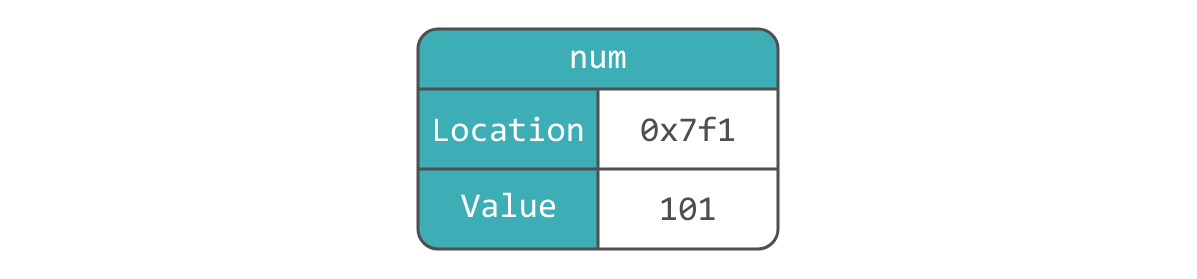

In [1]:
from IPython.display import Image, display

name = 'Новый проект (3).png'
display(Image(filename=f'D:\\images\\{name}'))

Здесь переменная num имеет виртуальный адрес 0x7f1 и значение 101. Если позднее нам захочется изменить значение num, это можно сделать так:

In [ ]:
num = 102;

Этот код присваивает переменной num новое значение 102, тем самым перезаписывая предыдущее значение. Это означает, что переменная num изменяема. Обновлённая схема памяти для нового значения:

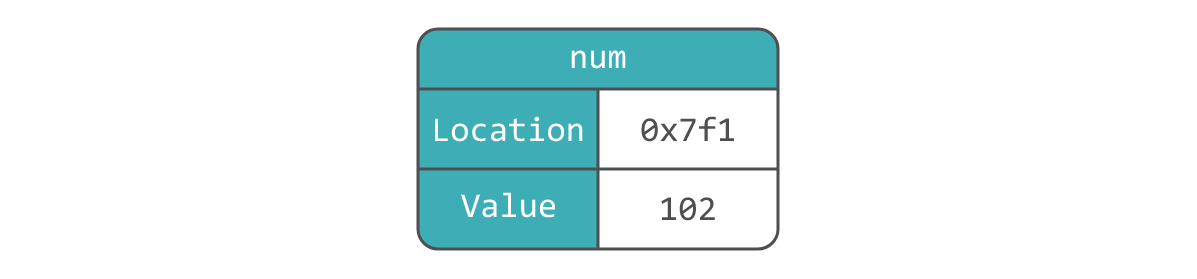

In [2]:
from IPython.display import Image, display

name = 'Новый проект (4).png'
display(Image(filename=f'D:\\images\\{name}'))

Обратите внимание, что расположение num в памяти не поменялось, только само значение. Это говорит о том, что num — это место в памяти, а не просто имя. Можно сказать, что переменная num владеет местом в памяти. По сути, num — это пустая коробка, которая может содержать лишь одно целое число (тип int).

Когда мы присваиваем num какое-то значение, мы тем самым помещаем значение в коробку, принадлежащую num. При этом создать новую переменную num1 можно следующим образом:

In [ ]:
int num1 = num;

Этот код создаёт новую коробку под названием num1 и копирует в неё значение из num. Теперь схема памяти выглядит так:

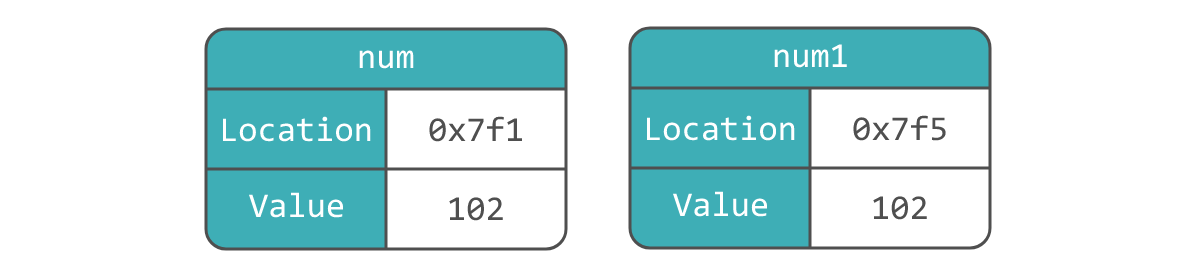

In [3]:
from IPython.display import Image, display

name = 'Новый проект (1) (2).png'
display(Image(filename=f'D:\\images\\{name}'))

Обратите внимание на местоположение num1 — 0x7f5. Хотя в num1 и было скопировано значение num, однако переменная num1 владеет новым адресом в памяти. Следовательно, мы можем перезаписывать значение num1, не влияя на num

In [ ]:
num1 = 103;

Теперь схема памяти выглядит так:

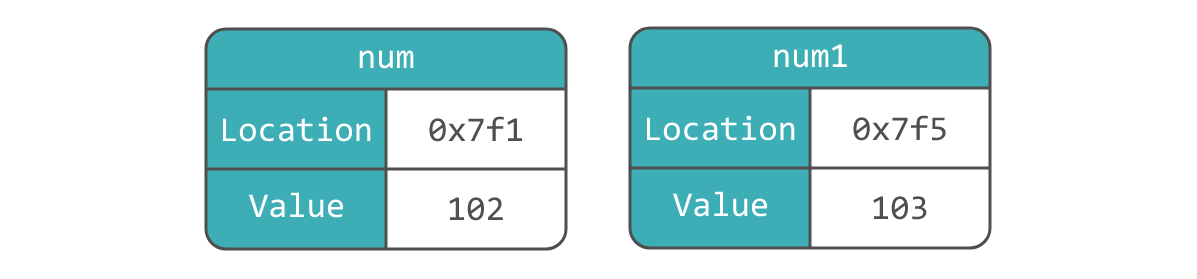

In [4]:
from IPython.display import Image, display

name = 'Новый проект (1) (3).png'
display(Image(filename=f'D:\\images\\{name}'))

Таким образом мы изменили значение переменной num1, но не ее местоположение. Кроме того, мы никак не повлияли на исходную переменную num.

С переменными в Python совершенно иная ситуация.

Переменные в Python

В Python нет переменных, как таковых, вместо них имена. Мы можем использовать термин переменные, однако важно понимать разницу между переменными и именами.

Давайте возьмём эквивалентный код из вышеприведённого примера на С (С++) и напишем его на Python:

In [ ]:
num = 101

Как и в C (С++), исполнение этой строки кода проходит через несколько этапов:

создаётся специальный объект PyObject
заполняется его поле Type, которое указывает на тип
заполняется его поле Value, которое указывает на значение
создаётся имя num
имя num начинает указывать на созданный PyObject
счётчик ссылок (поле Reference Count) объекта PyObject увеличивается на 1

Подробнее о счётчике ссылок (поле Reference Count) будет рассказано в уроке по сборщику мусора.

Если говорить о памяти, то это может выглядеть таким образом:

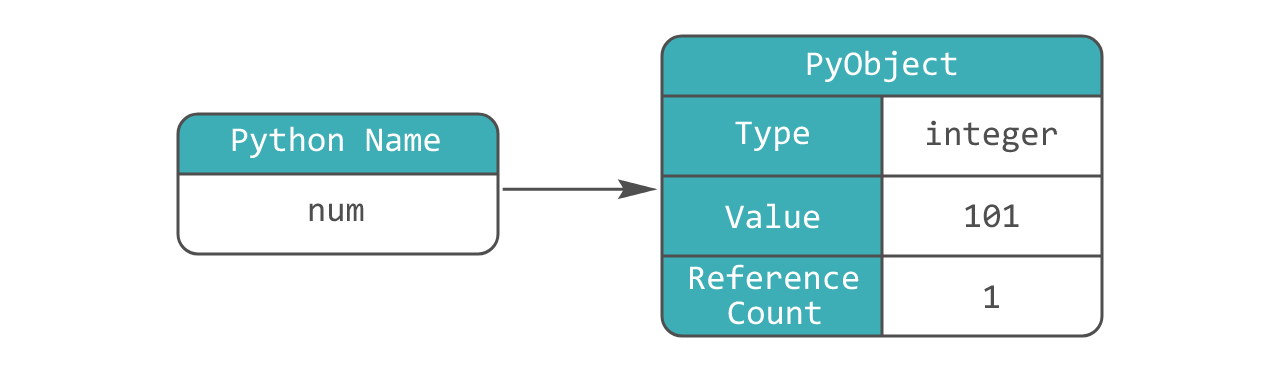

In [5]:
from IPython.display import Image, display

name = 'Новый проект (1) (4).png'
display(Image(filename=f'D:\\images\\{name}'))

Как мы видим, схема памяти в Python отличается от схемы в С (С++), показанной выше. Вместо того чтобы num владел блоком памяти, в котором хранится значение 101, этой памятью владеет PyObject объект.

Таким образом, в Python имя num не владеет напрямую каким-либо адресом в памяти.

Для присвоения нового значения имени num мы используем следующий код:

In [ ]:
num = 101
num = 102

Исполнение этой строки кода проходит через несколько этапов:

создаётся новый PyObject
заполняется его поле Type, которое указывает на тип
заполняется его поле Value, которое указывает на значение
имя num указывает на новый PyObject
счётчик ссылок (поле Reference Count) нового PyObject увеличивается на 1
счётчик ссылок (поле Reference Count) старого PyObject уменьшается на 1

Теперь схема памяти выглядит так:

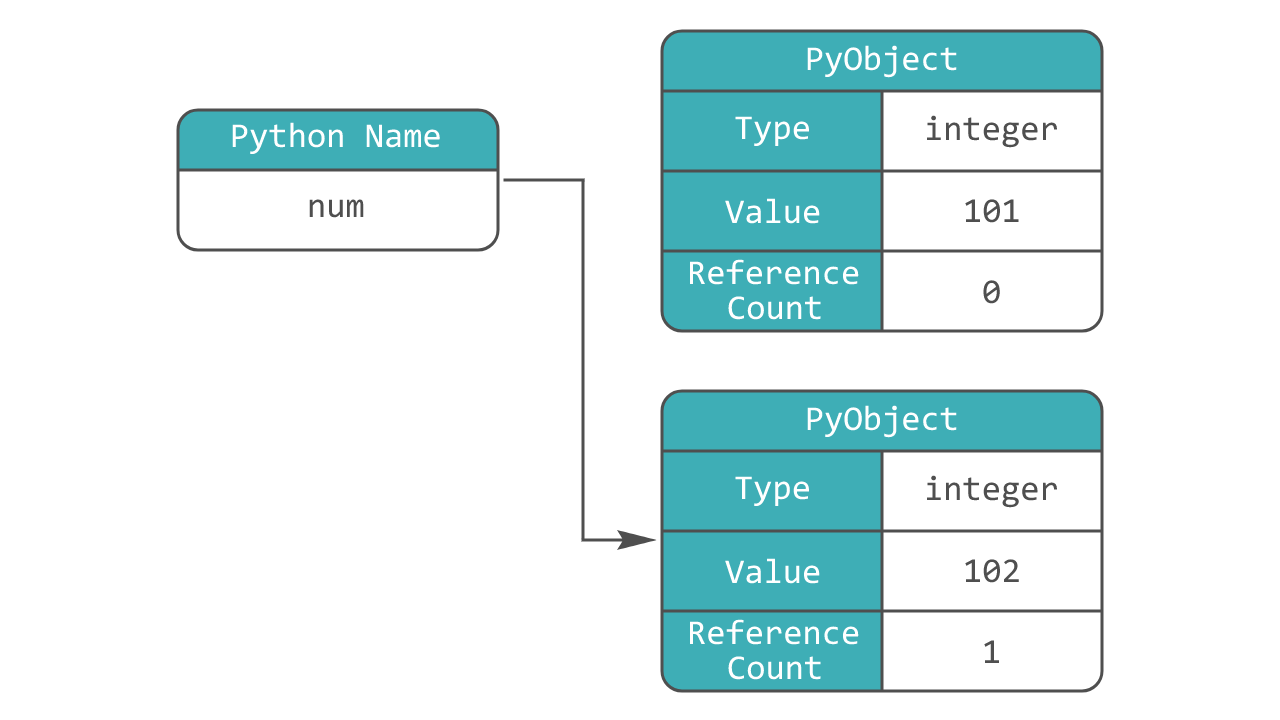

In [6]:
from IPython.display import Image, display

name = 'Новый проект (2) (1).png'
display(Image(filename=f'D:\\images\\{name}'))

Картинка выше демонстрирует, что num указывает на объект и не владеет областью памяти напрямую. Также мы видим, что строка кода num = 101 является не присваиванием, а, скорее, привязкой (binding) имени num к объекту.

Кроме того, предыдущий объект (содержавший значение 101) теперь находится в памяти со счётчиком ссылок, равным 0, и подлежит удалению с помощью сборщика мусора, о котором будет рассказано позже.

Мы можем ввести новое имя num1:

In [ ]:
num = 101
num = 102
num1 = num

В памяти появится новое имя num1, но не новый объект:

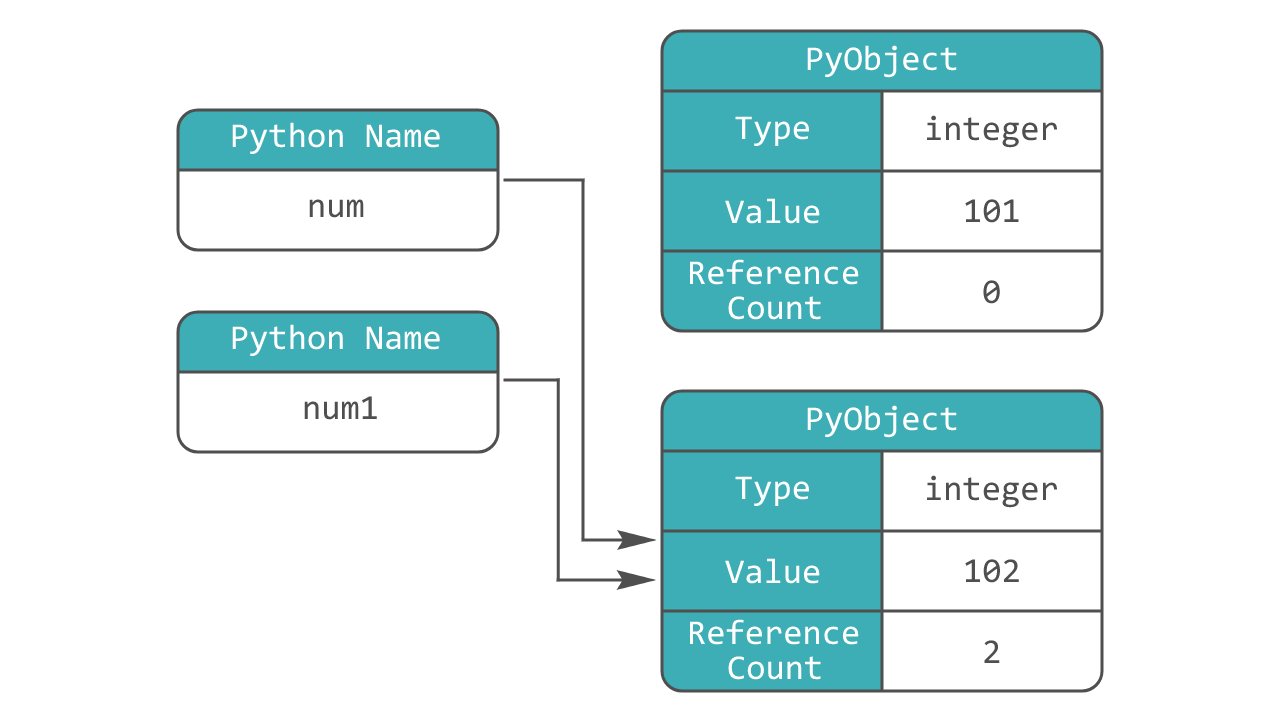

In [7]:
from IPython.display import Image, display

name = 'Новый проект (3) (1).png'
display(Image(filename=f'D:\\images\\{name}'))

Мы видим, что новый Python объект не создан, создано только новое имя, которое указывает на тот же объект. Кроме того, счётчик ссылок объекта увеличился на 1.

В Python мы не присваиваем переменные, а привязываем имена к объектам.

Примечание 3. PyObject определяется как C структура, которая характерна для CPython (стандартной реализации), и представляет базовую структуру всех объектов Python.

Встроенная функция id()

У каждого объекта в Python есть собственный идентификатор, который устанавливается только один раз при его создании. Идентификатор объекта – это целое и постоянное число, которое никогда не изменяется после его создания. В стандартной реализации Python (CPython) идентификатор объекта ассоциируется с адресом объекта в памяти. Для того чтобы получить идентификатор объекта, используется встроенная функция id().

In [14]:
name = 'Timur'
age = 29
is_teacher = True

print(id(name))
print(id(age))
print(id(is_teacher))

2367331521216
140703201819960
140703201026448


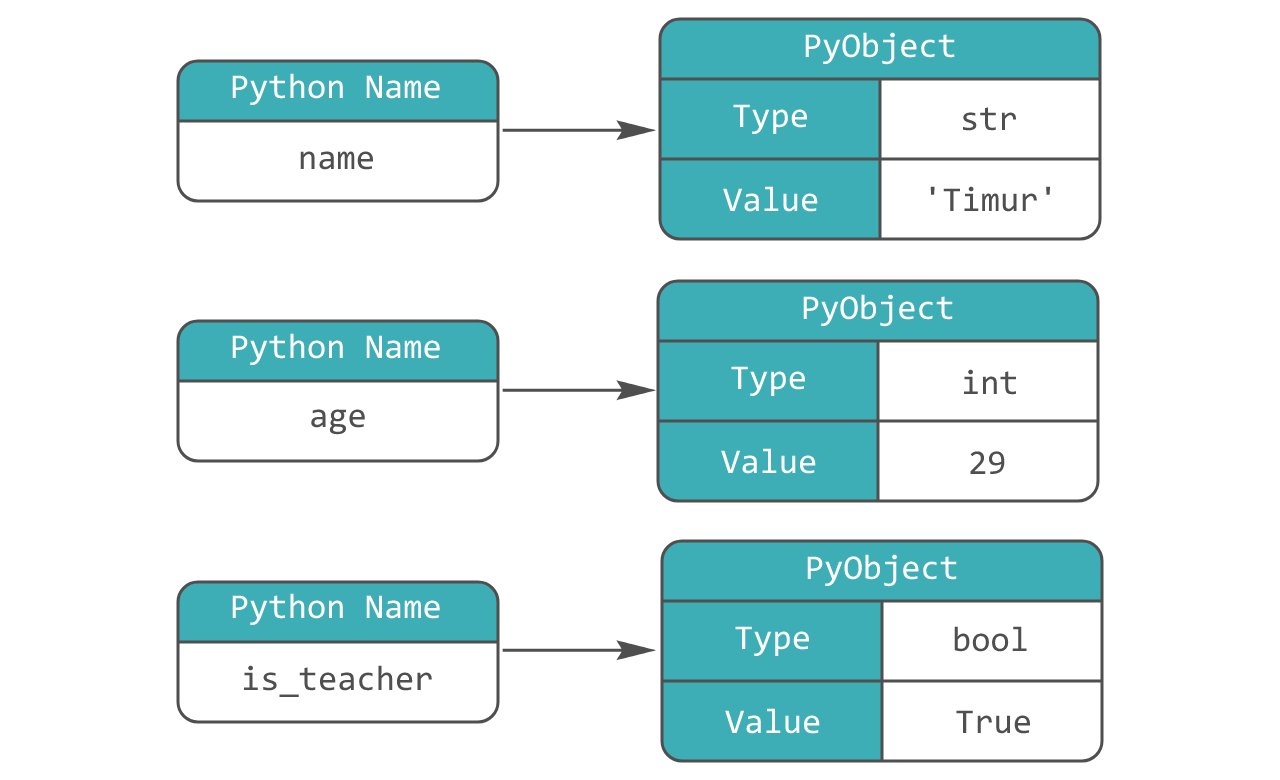

In [9]:
from IPython.display import Image, display

name = 'Новый проект (5).png'
display(Image(filename=f'D:\\images\\{name}'))

Имейте в виду, что при каждом новом запуске программы идентификаторы будут разные. Таким образом, объекты, периоды существования которых не пересекаются, могут иметь одинаковый идентификатор.

Важно понимать, что равные объекты в большинстве случаев имеют разные идентификаторы.

In [15]:
nums1 = [1, 2, 3]
nums2 = [1, 2, 3]

print(nums1 == nums2)
print(id(nums1))
print(id(nums2))

True
2367333873600
2367332470912


Причем значение True будет напечатано при любом запуске программы, так как списки nums1 и nums2 равны, а оператор сравнения == проверяет поэлементное равенство списков. Таким образом, переменные nums1 и nums2 указывают на разные адреса памяти, хоть и имеют одинаковое содержимое.

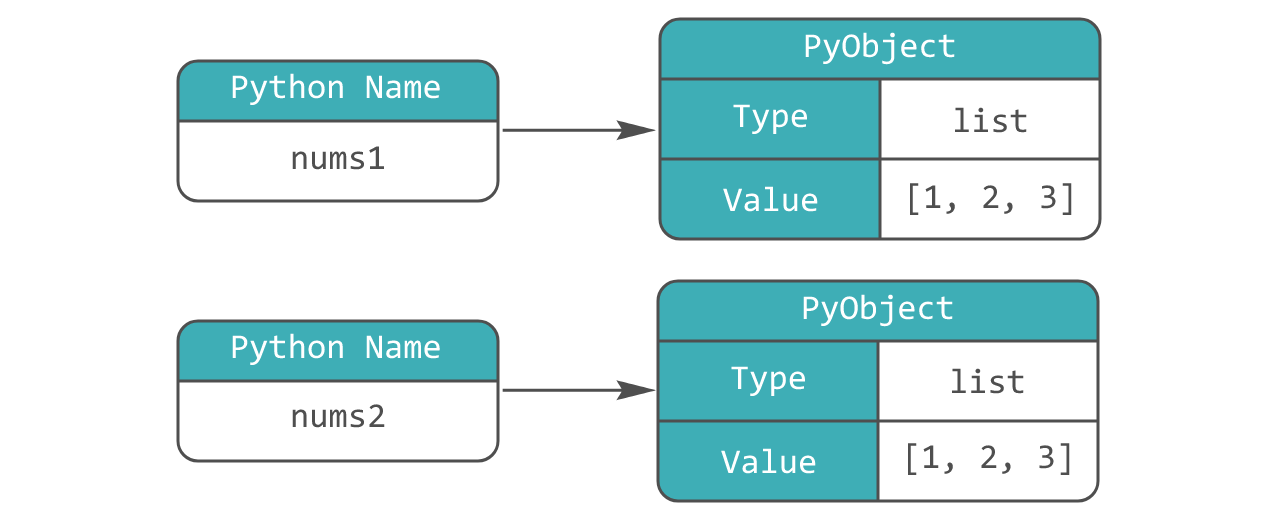

In [16]:
from IPython.display import Image, display

name = 'Новый проект (1) (5).png'
display(Image(filename=f'D:\\images\\{name}'))

Нужно также помнить, что оператор присваивания =, никогда не создает копию данных, а, скорее, привязывает имя к объекту.

In [26]:
nums1 = [1, 2, 3]
nums2 = nums1

print(id(nums1))
print(id(nums2))
print(id(nums1) == id(nums2))

2367333634880
2367333634880
True


всегда выводит одинаковые числа (числа могут отличаться от запуска к запуску программы):

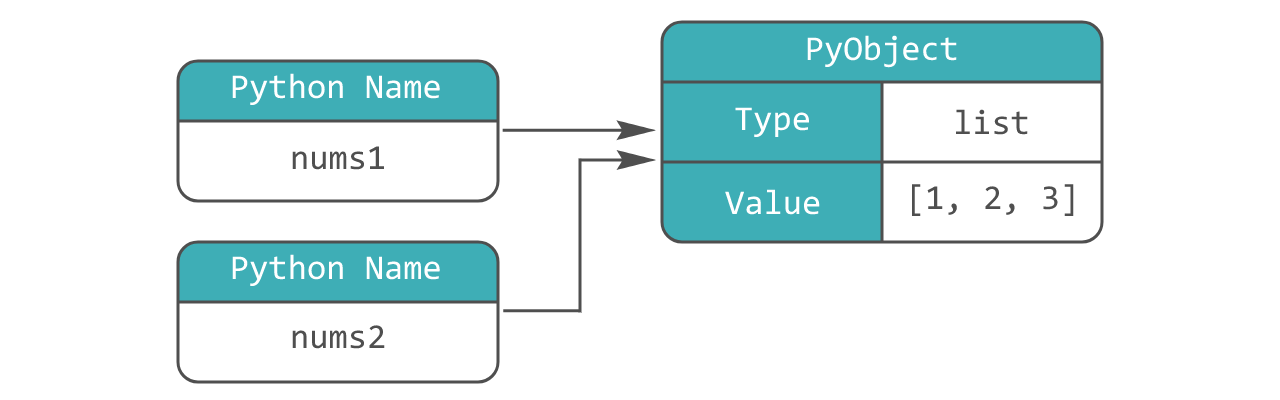

In [30]:
def picture(name: str):
    """
    Отображает изображение из указанного пути.

    :param name: Имя файла изображения, которое находится в папке 'D:\\images'.
    """
    from IPython.display import Image, display  # Импортируем необходимые модули внутри функции

    # Отображаем изображение
    display(Image(filename=f'D:\\images\\{name}'))
        
        
picture('Новый проект (2) (2).png')

Оператор is

С помощью оператора is можно сравнивать значение объектов на идентичность. Под идентичностью объектов подразумевается равенство их идентификаторов.

In [31]:
nums1 = [1, 2, 3]
nums2 = [1, 2, 3]
nums3 = nums1

print(nums1 is nums2, nums1 == nums2)
print(nums1 is nums3, nums1 == nums3)
print(nums2 is nums3, nums2 == nums3)

False True
True True
False True


Мы также можем использовать оператор not в связке с оператором is для проверки того, что два объекта не являются идентичными.

Примечания

Примечание 1. Для проверки значения на равенство None обычно используют is:

In [32]:
value = None

if value is None:
    print('Пусто')

Пусто


Примечание 3. Так как идентификатор объекта, возвращаемый функцией id(), является адресом памяти, его удобно представлять в шестнадцатеричной системе счисления с помощью функции hex().

In [33]:
nums1 = [1, 2, 3]
nums2 = [4, 5, 6]

print(hex(id(nums1)))
print(hex(id(nums2)))

0x2272fc90b40
0x2272ff42e80


In [34]:
value1 = None
value2 = None
print(value1 is value2)

True


None существует в единственном экземпляр

In [39]:
nums1 = [1, 2, 3, 4, 5]
nums2 = [1, 2, 3, 4, 5]

print(nums1 is nums2)

print(nums1 == nums2)
print(id(nums1) == id(nums2))
print(id(nums1) is id(nums2))

False
True
False
False


Интернирование объектов

Как мы знаем, в Python целые числа (тип int) и строки (тип str) являются неизменяемыми. Это значит, что после того как строковые и целочисленные объекты были созданы, мы не можем изменить или обновить их. Даже если кажется, что строка изменяется, например, после использования метода, на самом деле создается новая строка, а исходная остается прежней.

In [43]:
s1 = 'beegeek'

s2 = s1.lower()
s3 = s1.upper()

print(s1)
print(hex(id(s1)))
print(hex(id(s2)))
print(hex(id(s3)))

beegeek
0x227300eebb0
0x227300efcf0
0x227300edf20


Учитывая неизменяемость строковых и целочисленных объектов, Python использует специальную оптимизацию, которая называется интернированием. Интернирование – это процесс хранения в памяти только одной копии объекта. Это означает, что, когда мы создаем две строки (два целых числа) с одинаковыми значениями, то вместо выделения памяти для них обоих, только одна строка (целое число) фактически фиксируется в памяти. Другая же просто указывает на то же самое место в памяти. Для реализации данной оптимизации Python использует специальную таблицу, которая называется пул интернирования. Эта таблица содержит одну уникальную ссылку на каждый объект строкового типа, либо целого числа.

Интернирование целых чисел

Поскольку небольшие целые числа встречаются достаточно часто в нашем коде, Python интернирует их в диапазоне от −5 до 256.

In [44]:
num1 = 100
num2 = 100

num3 = 1000
num4 = 1000

print(num1 is num2, num1 == num2)
print(num3 is num4, num3 == num4)

True True
False True


In [ ]:
import sys
import importlib

sys.path.append('D:\\Git\\Python-Generation-a-Course-for-Professionals')
import functions  # Импортируйте модуль
importlib.reload(functions)  # Перезагрузите модуль, чтобы обновить его содержимое

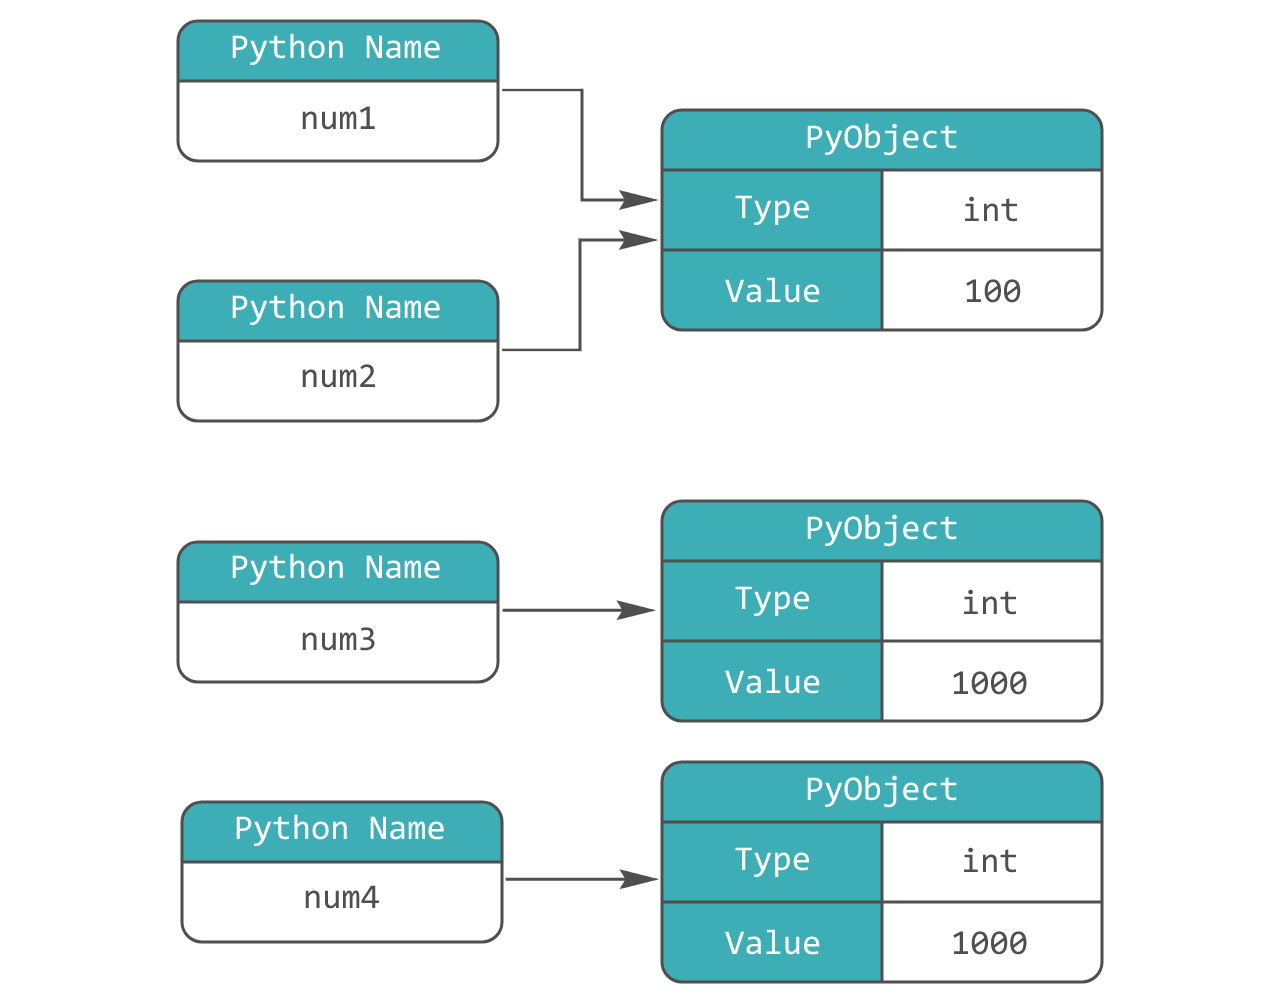

In [4]:
from functions import picture

picture('Новый проект (7).png')

Важно отметить, что среда, в которой выполняется код, влияет на то, как работает интернирование. Поведение может отличаться при использовании различных IDE (PyCharm, Thonny и т.д.), так как все они имеют собственные уровни оптимизации. Все примеры в данном конспекте, а также в задачах, предполагают, что код выполняется в IDLE Python 3.10.

IDLE (Integrated Development and Learning Environment) — это интегрированная среда для разработки (и обучения), которая поставляется вместе с Python.

Обратите внимание на то, что независимо от того, каким образом мы создаем целочисленный объект, если он находится в диапазоне от −5 до 256, он будет интернирован.

In [1]:
num1 = 100 
num2 = int(100)
num3 = int('100')
num4 = 1 + 2 + 97

print(id(num1))
print(id(num2))
print(id(num3))
print(id(num4))

140703201822232
140703201822232
140703201822232
140703201822232


Интернирование строк

В Python 3.7 интернируются строки, содержащие не более 20 символов и состоящие только из ASCII-букв, цифр и знаков подчёркивания. Данный набор символов был выбран потому, что он часто используется в нашем коде.

In [2]:
s1 = 'beegeek'
s2 = 'beegeek'
s3 = 'bee' + 'geek'

print(id(s1))
print(id(s2))
print(id(s3))

1984320539744
1984320539744
1984320539744


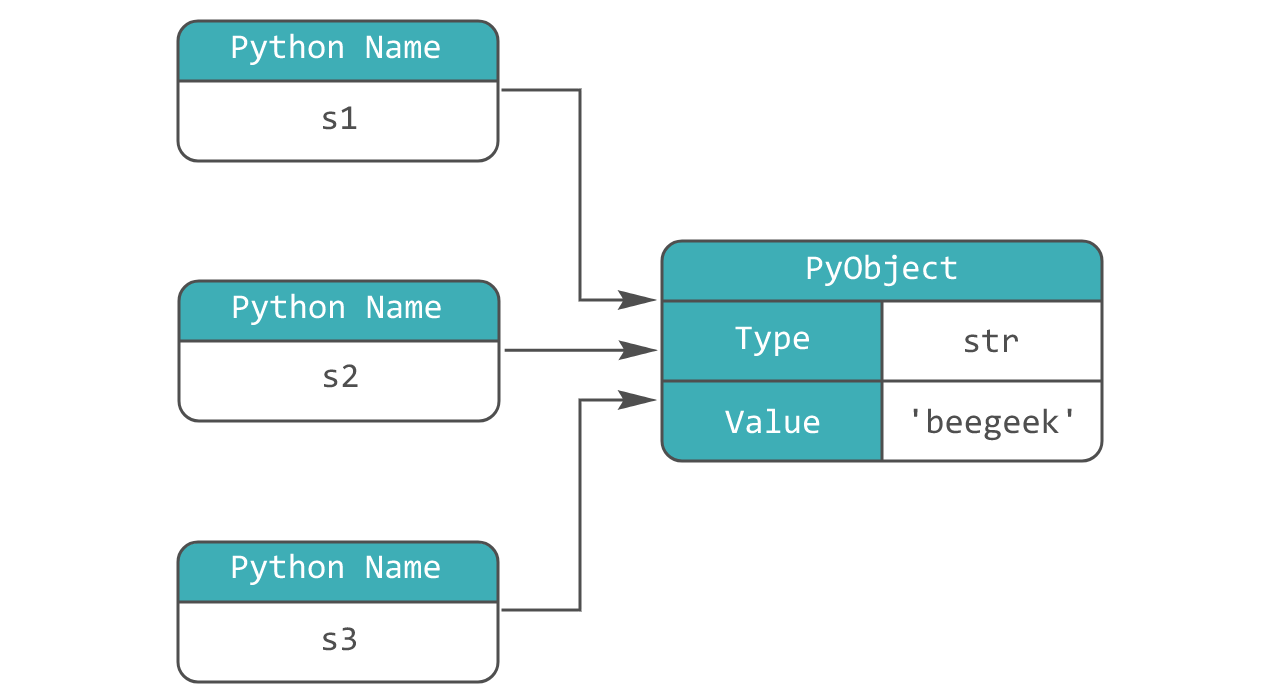

In [5]:
picture('Новый проект (3) (2).png')

В то время как приведенный ниже код:

In [6]:
s1 = 'beegeek!'
s2 = 'beegeek!'

print(id(s1))
print(id(s2))

1984328090800
1984328113776


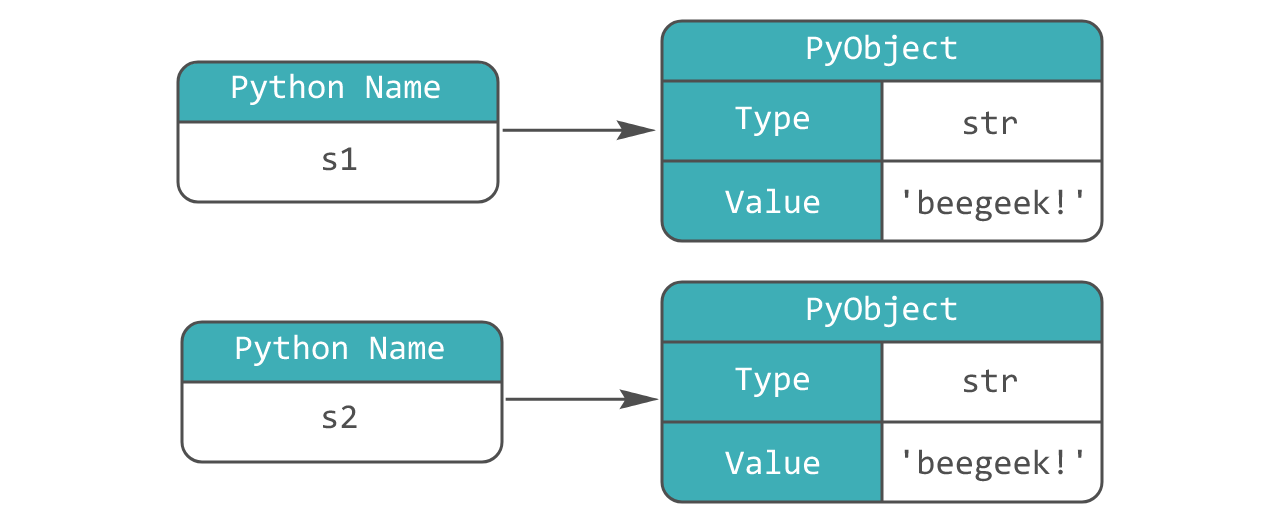

In [7]:
picture('Новый проект (2) (3).png')

В этом примере использован восклицательный знак, поэтому строки не интернируются и представляют собой разные объекты.

Начиная с Python 3.8 длина интернируемых строк была увеличена до 4096 символов.

In [9]:
s1 = 'b' * 4096
s2 = 'b' * 4096

s3 = 'b' * 4097
s4 = 'b' * 4097

print(s1 is s2)
print(s3 is s4)

True
False


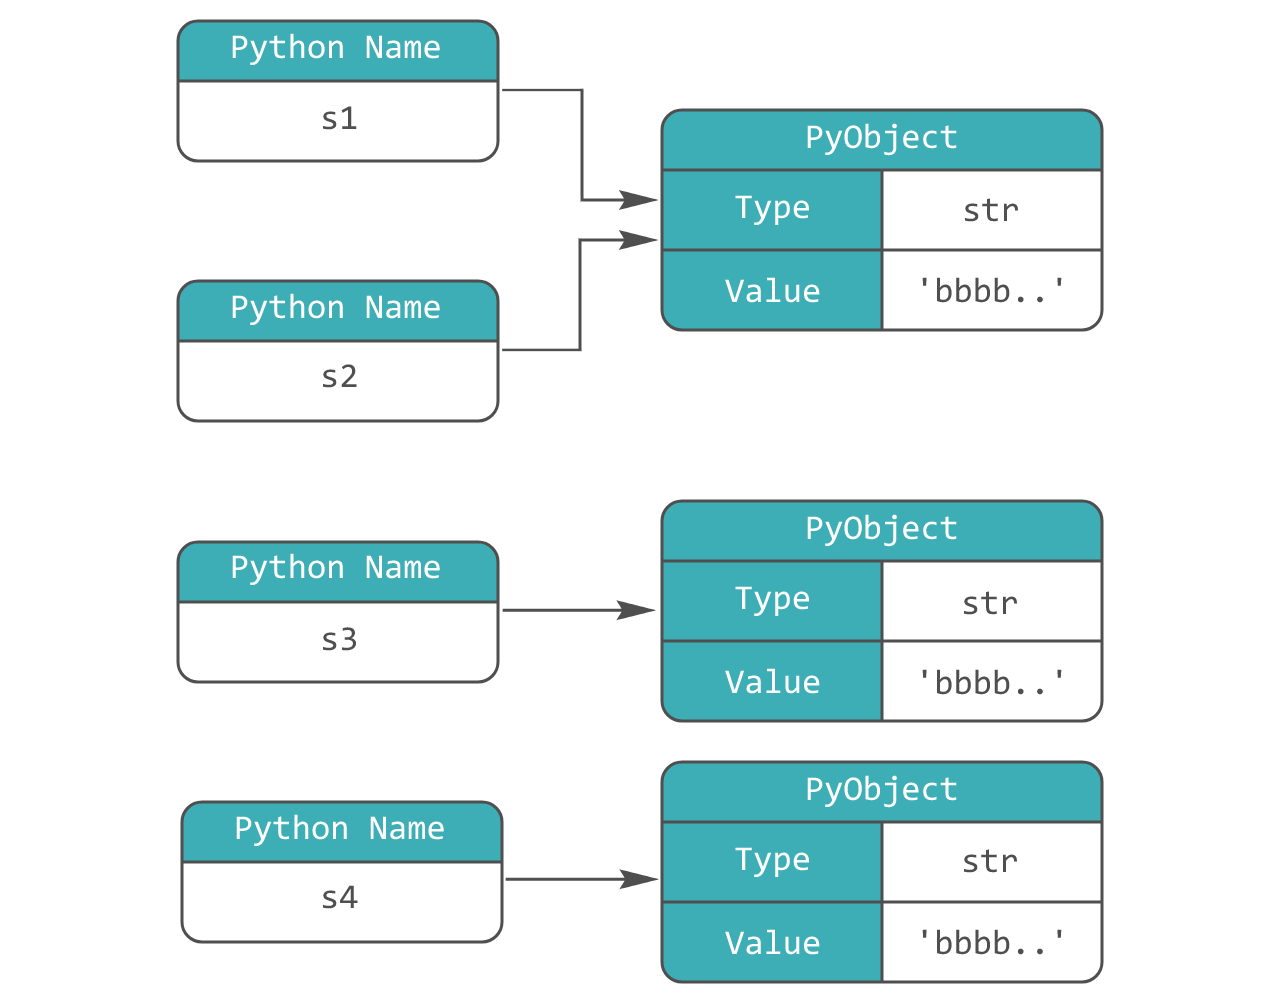

In [10]:
picture('Новый проект (1) (6).png')

Функция sys.intern()

Как мы уже знаем, Python интернирует лишь строки, содержащие не более 4096 символов и состоящие только из ASCII-букв, цифр и знаков подчёркивания. Однако функция intern() из модуля sys позволяет интернировать любую строку, например, содержащую 5000 символов или состоящую из букв русского алфавита. Данная функция принимает в качестве аргумента строку, добавляет ее в пул интернирования (если ее там нет) и возвращает интернированную строку.

In [11]:
s1 = 'степик!'
s2 = 'степик!'

print(s1 is s2)

False


In [12]:
import sys

s1 = sys.intern('степик!')
s2 = sys.intern('степик!')

print(s1 is s2)

True


Примечания

Примечание 1. Основные преимущества интернирования:

экономия памяти: мы не храним копии одинаковых объектов
быстрые сравнения: сравнение интернированных строк происходит намного быстрее, чем неинтернированных строк. Это происходит потому, что для сравнения интернированных строк нужно только сравнить, совпадают ли их адреса в памяти, а не сравнивать их содержимое

Примечание 2. Интернирование объектов не всегда работает очевидно, поэтому мы всегда можем использовать встроенную функцию id() и оператор is для определения идентичности объектов.